<a href="https://colab.research.google.com/github/FernandaSantos225/da-ebac/blob/main/M37_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Amazon Web Services;</li>
  <li>AWS IAM;</li>
  <li>AWS S3;</li>
  <li>AWS Athena.</li>
</ol>

---

# **Exercícios**

## 1\. Amazon Web Services

 1. Crie uma conta na [AWS](https://portal.aws.amazon.com/);
 1. Acesse a sua conta e selecione a região mais próxima da sua residência.

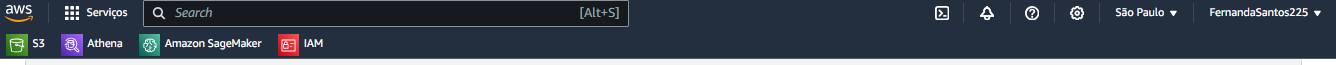

## 2\. AWS S3

Replique as atividades do item 3.3 em sua conta.


> **Carregando as bibliotecas:**

In [ ]:
import pandas as pd
import seaborn as sns

> **Coletando os dados:**

In [ ]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
data.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

> **Exportando os dados:**

In [ ]:
data.to_csv('car_crashes.csv', index=False, header=False)

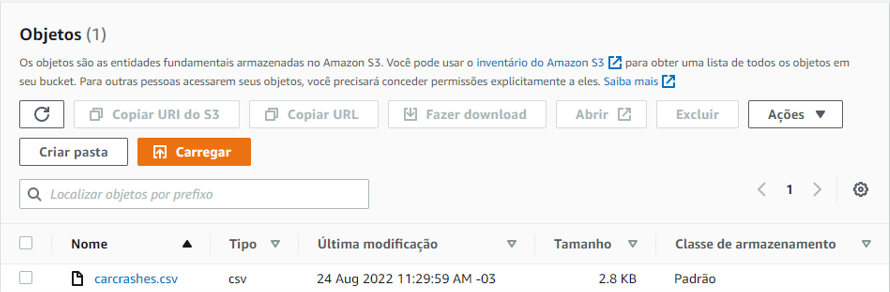

## 3\. AWS Athena

Replique as atividades do item 4.3 em sua conta.

> **Código utilizado para criar a tabela na AWS:**

```sql
CREATE EXTERNAL TABLE carcrashes (
  total float,
  speeding float,
  alcohol float,
  not_distracted float,
  no_previous float,
  ins_premium float,
  ins_losses float,
  abbrev string
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar'=',')
LOCATION 's3://ebac-37-fernandasantos225/'
```



> **Consultas SQL:**

**Query 1**:
```sql
--Número de linhas:
SELECT COUNT(*) FROM carcrashes;
```

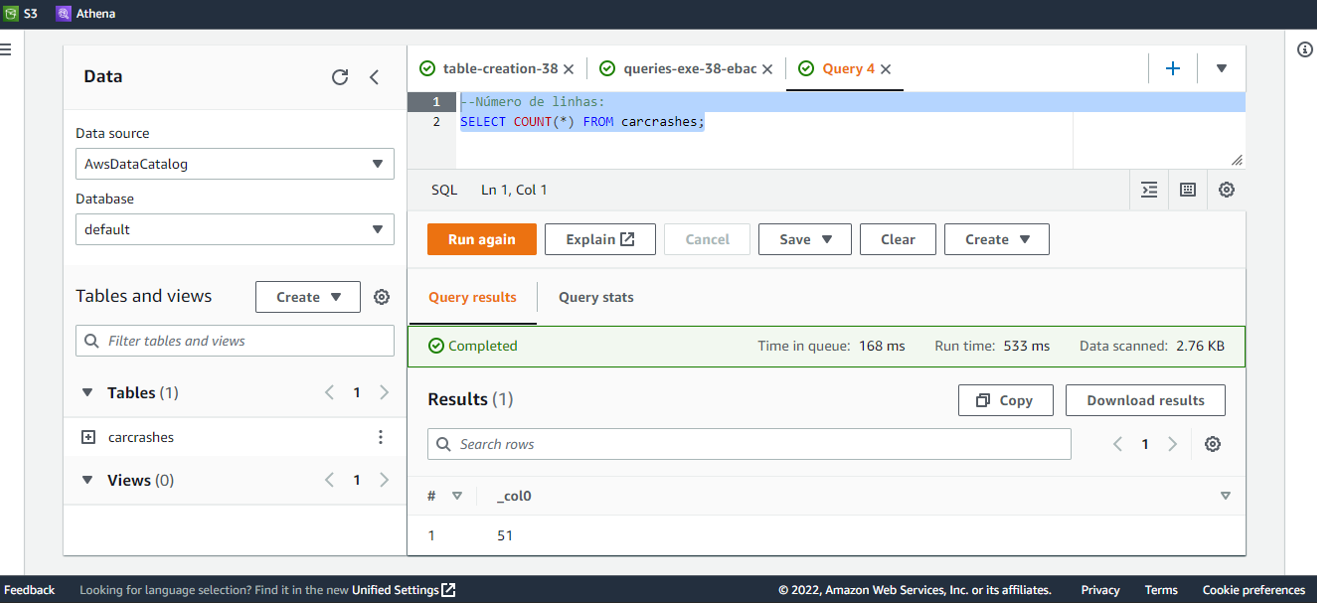

**Query 2**:
```sql
--Checando as primeiras linhas do dataset:
SELECT * FROM carcrashes
LIMIT 5;
```
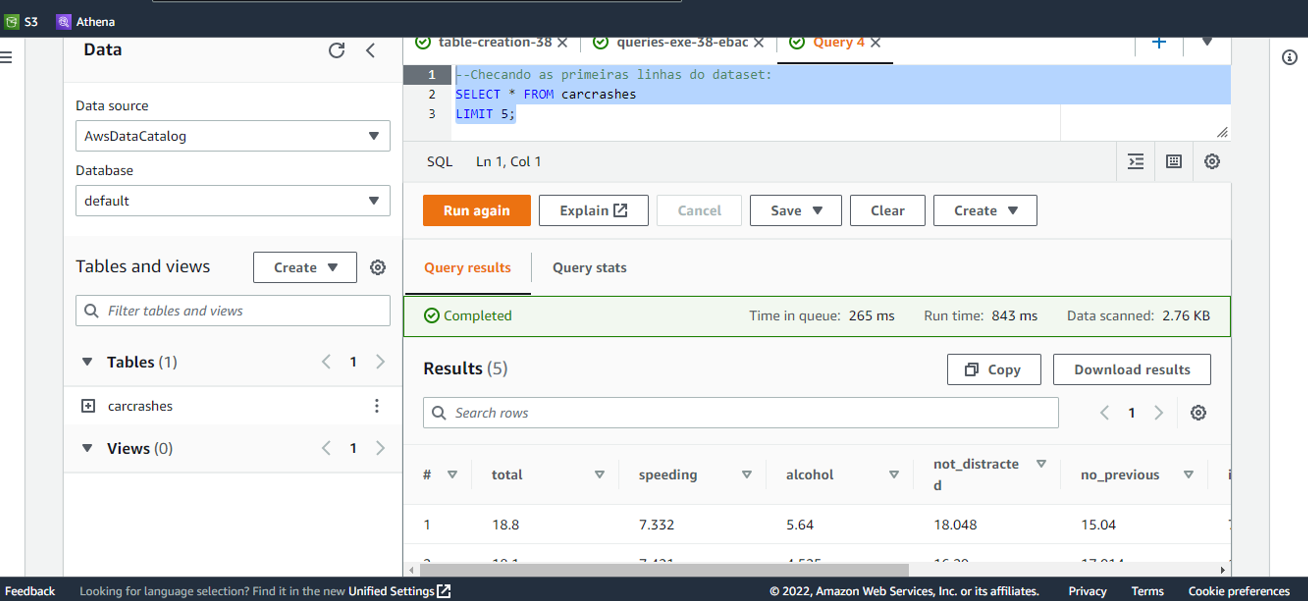

**Query 3**:
```sql
--Top 5 estados com menos "crashes":
SELECT
  abbrev AS state,
  SUM(total) AS total_crashes
FROM carcrashes
GROUP BY abbrev
ORDER BY 2 DESC
LIMIT 5;
```
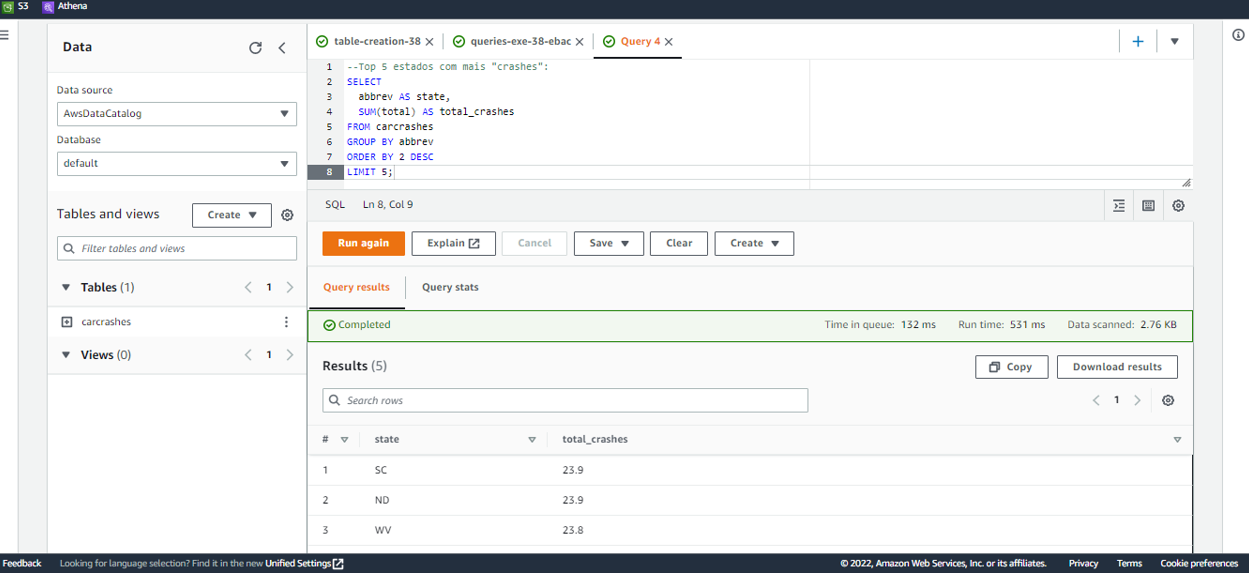

**Query 4**:
```sql
--Top 5 estados com menos "crashes":
SELECT
  abbrev AS state,
  SUM(total) AS total_crashes
FROM carcrashes
GROUP BY abbrev
ORDER BY 2 ASC
LIMIT 5;
```
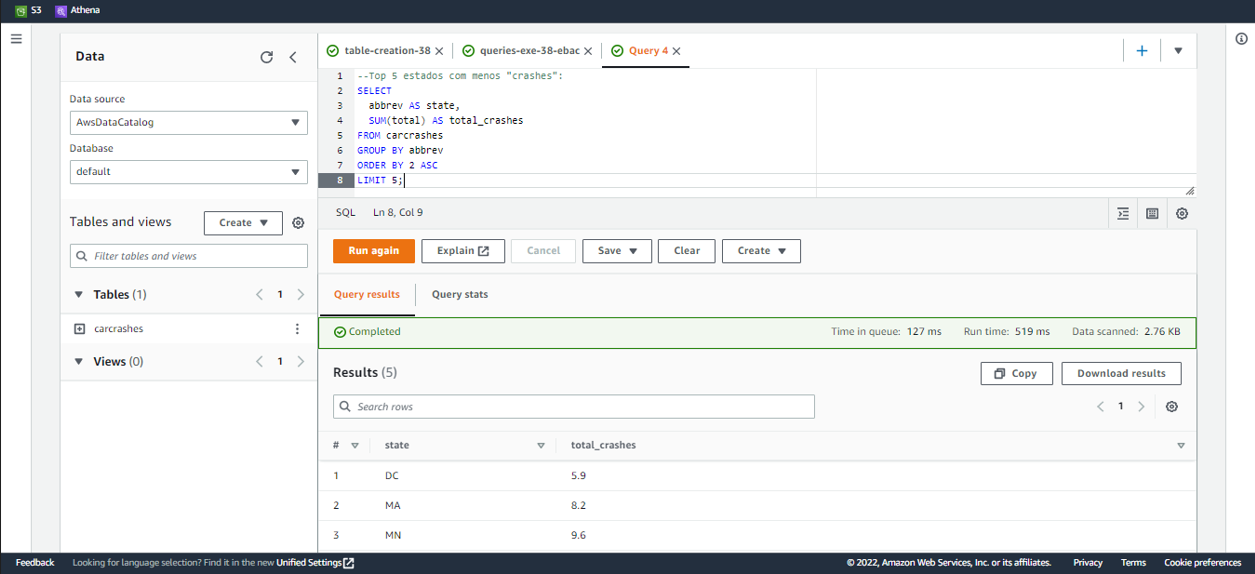